> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: IInvestigate The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: This data set contains information
about 10,000 movies collected from The Movie Database (TMDb),
including user ratings and revenue. the description available on the homepage-links present [here]https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv.
there are 21 columns(id, imdb_id, popularity, budge, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year,  budget_adj, revenue_adj)    

### Question(s) for Analysis
>**Tip**:What are the most common genres of movies?
Which genres are most popular from year to year? 
which movie genres have most popularty,runtime, vote count and revenue?
What kinds of properties are associated with movies that have high revenues?

In [1]:
# import statements for all of the packages will be used in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling
load the data and star data wrangling 

In [3]:
# Load your data and print out a few lines.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
sum(df.duplicated())

1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [10]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

## Data cleaning
### Now start to clean the data by drop some unnecessary columns and the null values

In [12]:
df.drop(['homepage', 'tagline', 'keywords'], axis = 1, inplace = True)
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [13]:
df[df.production_companies.isnull()]
df.dropna(inplace=True)
df.shape 

(9771, 18)

### drop the duplicated rows and show the information about new data


In [14]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [ ]:
df.info()

### clean the columns (genres , cast) that contain multiplevalues separated by pipe (|) characters.


In [19]:
df['genres'] = df['genres'].map(lambda x: x.replace('|','-'))
df['cast'] = df['cast'].map(lambda x: x.replace('|','-'))
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt-Bryce Dallas Howard-Irrfan Khan-Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action-Adventure-Science Fiction-Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy-Charlize Theron-Hugh Keays-Byrne-Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action-Adventure-Science Fiction-Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley-Theo James-Kate Winslet-Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure-Science Fiction-Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford-Mark Hamill-Carrie Fisher-Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action-Adventure-Science Fiction-Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel-Paul Walker-Jason Statham-Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action-Crime-Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### we can get any information that we need like the highest revenue movie name 

In [20]:
df['revenue'].idxmax()

1386

In [21]:
df['original_title'].iloc[1386]

"L'ArmÃ©e du crime"

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**:After trimmed and cleaned the data, now ready to move on to exploration. **Compute statistics** and **create visualizations** 
### Explor our data

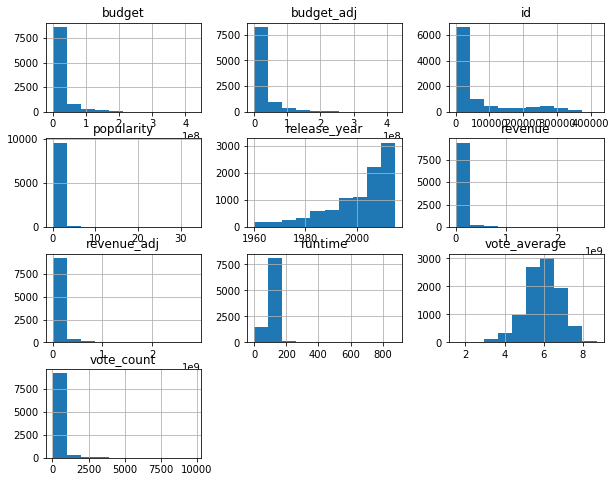

In [22]:
df.hist(figsize=(10,8));

###  We notice that most of the rows do not follow the normal distribution and all of them lean skewed to the right exept the release year and vote average
## the frist question What are the most common genres of movies?

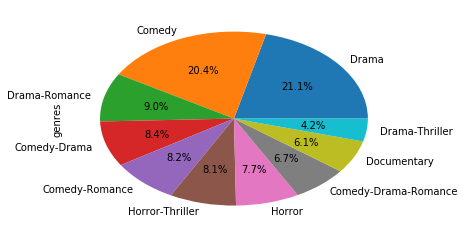

In [23]:
df['genres'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie',autopct='%1.1f%%');
plt.title('The presentage distrubtion of movied genres', fontsize=18)

### We notice now that the most produced genres of movies are in order drama, comedy and romantic drama then the rest of the genres in smaller proportions
## the second question Which genres are most popular from year to year? 

In [60]:
def genres_year(year, year_str):
    release_year = df.query(year)
    movies_genres = release_year['genres'].value_counts().index
    release_year['genres'].value_counts()[movies_genres].sort_values(ascending=False).head(10).plot(kind='bar', color='blue', alpha=.7);
    plt.xlabel('Movies genres', fontsize=18)
    plt.ylabel('Sum of genres', fontsize=18)
    plt.title('The movies genreas in year '+ year_str, fontsize=18)
    



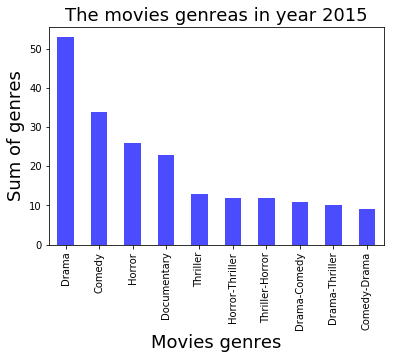

In [61]:
genres_year('release_year == 2015', '2015')

Text(0.5,1,'The movies genreas in year 2010')

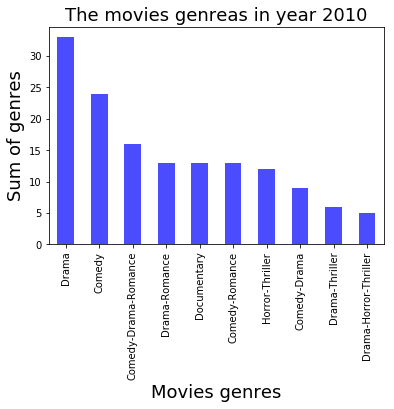

In [39]:
genres_year('release_year == 2010', '2010')

### After plot the genres of movies produced in 2015 and comparing them with the genres of movies produced in 2010, we find some differences, but they are simple, for example, the two most produced genres are comedy and drama, but there are some slight differences as the perferences of the audience did not differ very much 

In [1]:
genres_year('release_year == 1960', '1960')


NameError: name 'genres_year' is not defined

### But when comparing the genres movies produced in 1960, we find a greater difference cause of the difference in audience preferences according to the different time period

### the third question which movie genres have most popularty,runtime, vote count and revenue?

In [55]:
def average_property(property):
    ave_property = df.groupby('genres')[property].mean()
    ave_property.sort_values(ascending=False).head(10).plot(kind='bar', color='orange', alpha=.7);
    plt.xlabel('Movies genres', fontsize=18)
    plt.ylabel('Average '+ property, fontsize=18)
    plt.title('The average '+property +' of movies genres', fontsize=18)
    

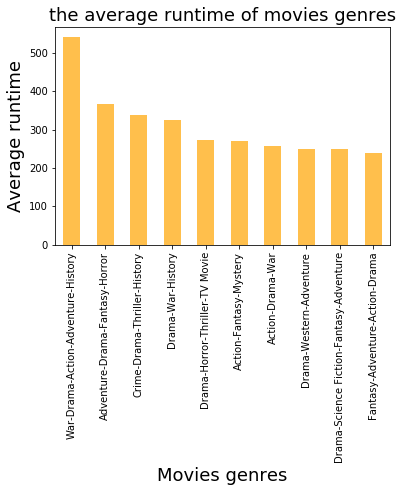

In [56]:
average_property('runtime')

## the genres of higher average number of run times are drama and adventure movies

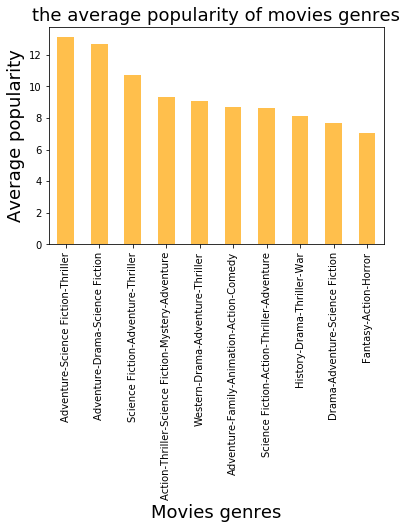

In [57]:
average_property('popularity')

## the genres of higher average popularity  are adventure and drama

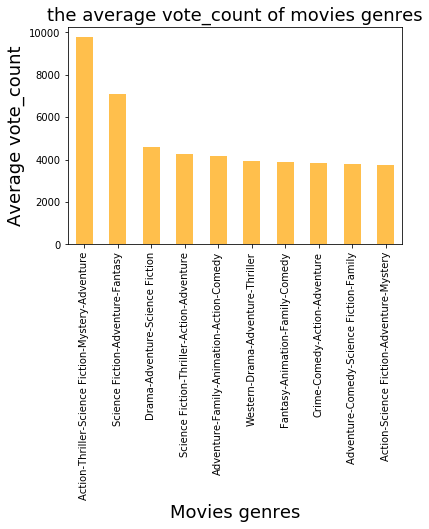

In [58]:
average_property('vote_count')

## the genres of higher average vote count are adventure movies , action and science fiction

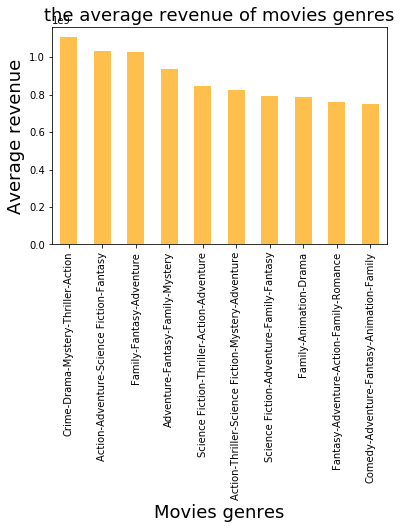

In [59]:
average_property('revenue')

### the genres of higher average revenue crime drama, action and adventure-science fiction 

## last question :What kinds of properties are associated with movies that have high revenues?

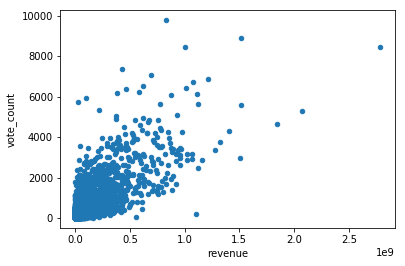

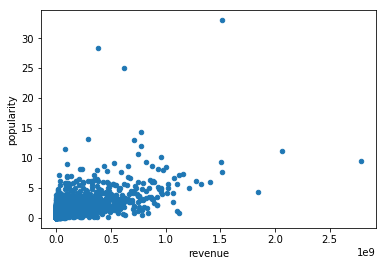

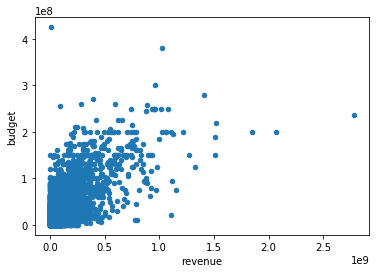

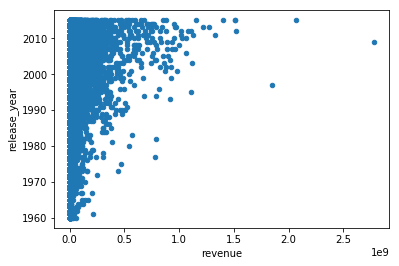

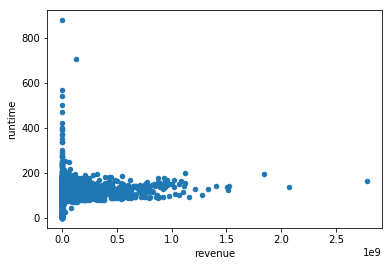

In [32]:

df.plot(x='revenue', y='vote_count', kind='scatter')
df.plot(x='revenue', y='popularity', kind='scatter')
df.plot(x='revenue', y='budget', kind='scatter')
df.plot(x='revenue', y='release_year', kind='scatter')
df.plot(x='revenue', y='runtime', kind='scatter')


### there are three positive correlation properties are associated with movies that have high revenues (vote count- popularity - budget) with some outlier values

<a id='conclusions'></a>
## Conclusions

### Results
1- We notice now that the most produced genres of movies are in order drama, comedy and romantic drama then the rest of the genres in smaller proportions
2- the genres of movies produced in 2015 and comparing them with the genres of movies produced in 2010 notice some slight differences as the perferences of the audience did not differ very much but in 1960 we find a greater difference cause of the difference in audience preferences according to the different time period
3- the most movies genres are adventure movies , action, drame and science fiction in spite of change the different properties
4- there are three positive correlation properties are associated with movies that have high revenues (vote count- popularity - budget) with some outlier values

### limitations
1- there are large values of movies genres that causes difficult to plot the entire column  
2- There is no normalization is considered during this analysis and our analysis is limited to the numerical values of revenue 
3- Most important variable is categorical, that does not allow to use stronge statisical methods

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])